## Sanya Garg (2022UCA1826)
## AIHT Task 12

Renewable Energy Usage Trends

● Analyze global renewable energy trends from the IEA.

● Create visualizations to compare energy consumption across countries and
years.

In [ ]:
# Install required libraries (if not already installed)
if (!require(ggplot2)) install.packages("ggplot2", dependencies=TRUE)
if (!require(dplyr)) install.packages("dplyr", dependencies=TRUE)

# Load libraries
library(ggplot2)
library(dplyr)

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Read dataset
data_path <- "Renewable.csv"  # Make sure to upload this file to Colab first
renewable <- read.csv(data_path)

# Display column names
colnames(renewable)

[1] "Household_ID"      "Region"            "Country"          
 [4] "Energy_Source"     "Monthly_Usage_kWh" "Year"             
 [7] "Household_Size"    "Income_Level"      "Urban_Rural"      
[10] "Adoption_Year"     "Subsidy_Received"  "Cost_Savings_USD"

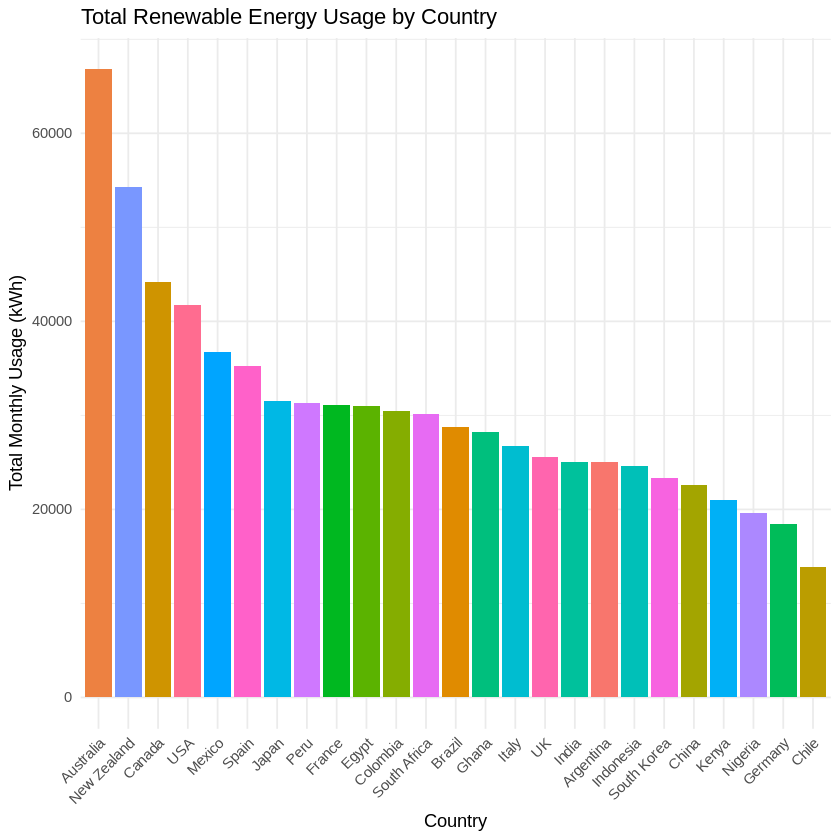

In [ ]:
# Data Cleaning and Processing
renewable <- renewable %>%
  filter(!is.na(Monthly_Usage_kWh) & Monthly_Usage_kWh > 0) %>%  # Remove invalid data
  mutate(Year = as.numeric(Year))  # Ensure Year is numeric

# Total usage by country
country_usage <- renewable %>%
  group_by(Country) %>%
  summarise(Total_Usage = sum(Monthly_Usage_kWh, na.rm = TRUE)) %>%
  arrange(desc(Total_Usage))

ggplot(country_usage, aes(x = reorder(Country, -Total_Usage), y = Total_Usage, fill = Country)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(
    title = "Total Renewable Energy Usage by Country",
    x = "Country",
    y = "Total Monthly Usage (kWh)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


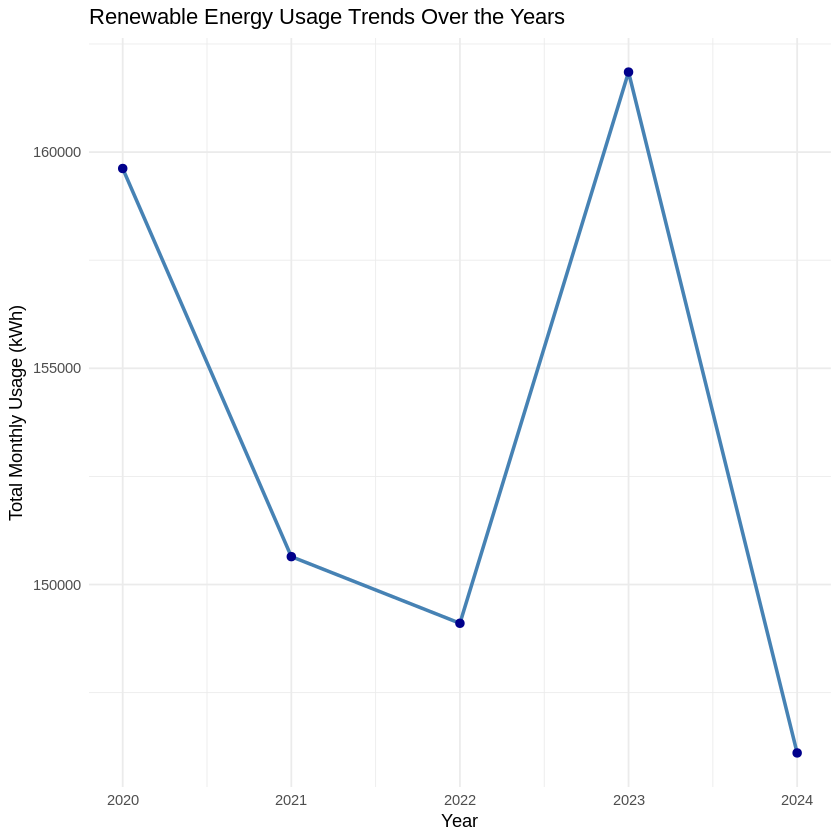

In [ ]:
# Yearly trends
yearly_trends <- renewable %>%
  group_by(Year) %>%
  summarise(Total_Usage = sum(Monthly_Usage_kWh, na.rm = TRUE))

ggplot(yearly_trends, aes(x = Year, y = Total_Usage)) +
  geom_line(color = "steelblue", size = 1) +
  geom_point(color = "darkblue", size = 2) +
  labs(
    title = "Renewable Energy Usage Trends Over the Years",
    x = "Year",
    y = "Total Monthly Usage (kWh)"
  ) +
  theme_minimal()

`summarise()` has grouped output by 'Region'. You can override using the
`.groups` argument.


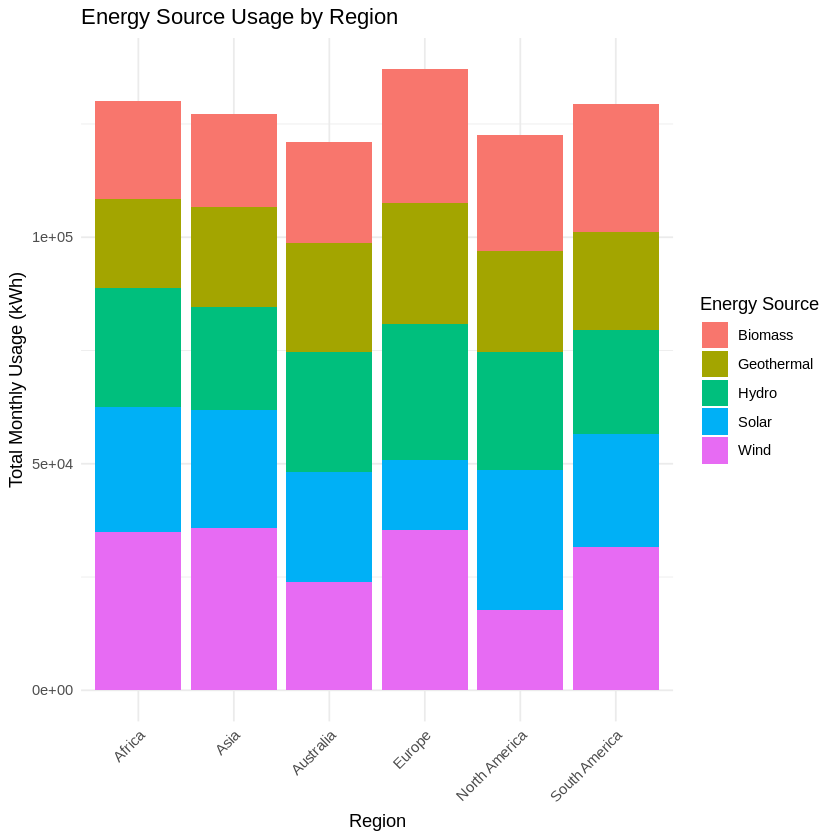

In [ ]:
# Energy source usage by region
source_region_usage <- renewable %>%
  group_by(Region, Energy_Source) %>%
  summarise(Total_Usage = sum(Monthly_Usage_kWh, na.rm = TRUE))

ggplot(source_region_usage, aes(x = Region, y = Total_Usage, fill = Energy_Source)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    title = "Energy Source Usage by Region",
    x = "Region",
    y = "Total Monthly Usage (kWh)",
    fill = "Energy Source"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

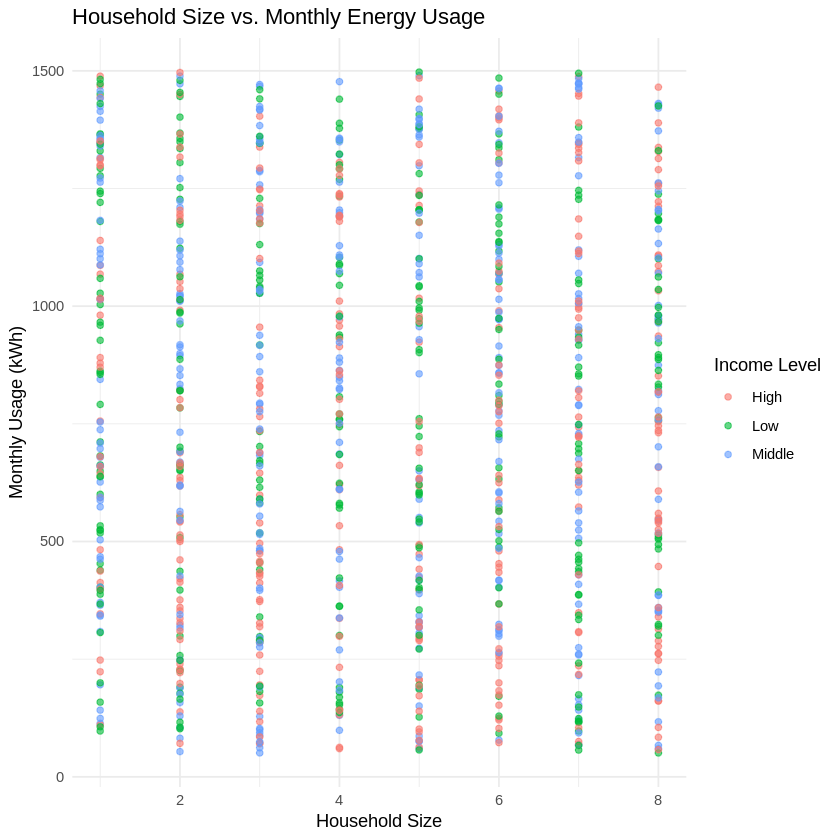

In [ ]:
# Household size vs. Monthly energy usage
ggplot(renewable, aes(x = Household_Size, y = Monthly_Usage_kWh, color = Income_Level)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Household Size vs. Monthly Energy Usage",
    x = "Household Size",
    y = "Monthly Usage (kWh)",
    color = "Income Level"
  ) +
  theme_minimal()